# Maximum Likelihood Estimation

Suppose each data is generated by a gaussian $x^t \tilde  N(x^t; {\mu, \sigma^2}) $




Max $ p(X/\theta) = \prod_{t=1}^N p(x/\theta)$

Log trick

$$ Max\;\; L(X/\theta) = \sum_{t=1}^N log (p(x/\theta)) $$



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sigma = 1
mu = 10

data = sigma * np.random.randn(100) + mu

In [4]:
data

array([ 9.36787939, 10.19288171,  9.9913139 ,  9.75143479, 10.05120586,
       12.06376556, 11.30613655,  9.11197867, 10.60270345,  9.18642578,
       11.45511218, 10.70669912,  9.36204471,  9.80019838,  9.61087667,
        9.3381434 , 10.52661571,  9.662368  , 10.48808068,  8.82843055,
        8.48337928, 10.5309902 ,  8.77748673,  9.30580487,  9.9195027 ,
       10.4949799 ,  9.944941  , 10.01665147, 10.7851952 , 11.0031438 ,
        7.71887368,  9.35270544, 11.10471888, 10.55205354, 10.59144767,
       11.19374196,  9.01203813,  8.62637902,  9.65013484, 10.69606952,
        9.85284568, 11.17699193, 11.07050425,  8.91100164, 10.56344559,
        9.19624469, 10.03516266,  9.83363677, 10.14117163,  9.63476396,
        9.71688508,  7.53063304, 11.25761991, 10.26546977,  9.93931569,
        9.11069634, 10.50216194, 12.24350154, 10.20313609, 11.92459939,
       10.23247021, 10.32374011, 10.51555678, 12.18372567,  8.86719164,
       11.09796474, 10.91324097,  9.5521353 ,  7.98257494,  8.78

In [5]:
data.mean()

9.959395217685252

In [6]:
data.var()

1.1271814520278214

# two class

In [7]:
sigma = 2
mu1 = 10
mu2 = 20

data1 = sigma * np.random.randn(100) + mu1
data2 = sigma * np.random.randn(100) + mu2

In [8]:
x = np.concatenate((data1,data2))
y = [0]*100 + [1]*100

In [9]:
data = pd.DataFrame.from_dict({"x": x, "r":y})

In [10]:
data

,x,r
0,8.848042,0
1,8.637224,0
2,5.943057,0
3,8.081838,0
4,12.067727,0
...,...,...
195,20.219626,1
196,19.640706,1
197,23.013735,1
198,19.429699,1


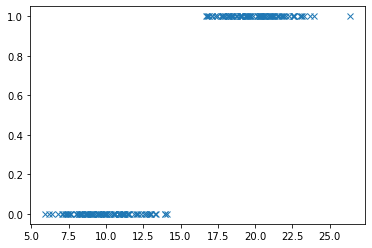

In [11]:
plt.plot(x, y, 'x')

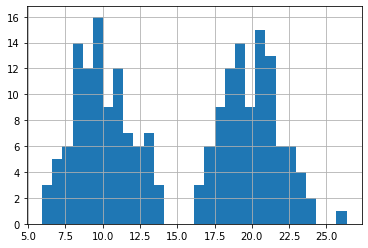

In [12]:
data['x'].hist(bins = 30)

In [13]:
data[data['r'] == 0]

,x,r
0,8.848042,0
1,8.637224,0
2,5.943057,0
3,8.081838,0
4,12.067727,0
...,...,...
95,9.165798,0
96,8.749004,0
97,11.238118,0
98,8.427590,0


In [14]:
data[data['r'] == 0]['x'].mean()

9.949463810932139

In [15]:
data[data['r'] == 1]['x'].mean()

19.987387175734682

In [16]:
data[data['r'] == 1]['x'].std()

1.8665830615627625

# Bayes 

$$
p(c_i / x) = \frac{p(x/c_i) p(c_i)}{p(x)} \approx p(x/c_i) p(c_i)
$$


Our model

$$
g_i(x) = log p(x/c_i) + log p(c_i)
$$

Gaussian
$$
p(x; \theta, \sigma^2) = \frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

In [22]:
mu0 = data[data['r'] == 0]['x'].mean()
mu1 = data[data['r'] == 1]['x'].mean()

mu0, mu1

(9.949463810932139, 19.987387175734682)

In [23]:
sig0 = data[data['r'] == 0]['x'].std()
sig1 = data[data['r'] == 1]['x'].std()
sig0, sig1

(1.9078216258580603, 1.8665830615627625)

In [24]:
prior0 = np.sum(data['r'] == 0)/len(data)
prior1 = np.sum(data['r'] == 1)/len(data)
prior0,prior1

(0.5, 0.5)

In [25]:
from scipy import stats

def model(x, mu, std, prior):
    snd = stats.norm(mu, std)
    return np.log(snd.pdf(x)) + np.log(prior)

In [26]:
g0 = model(15, mu0, sig0, prior0)
g0

-5.762090934524351

In [27]:
g1 = model(15, mu1, sig1, prior1)
g1

-5.805811498691422

In [28]:
g0 = model(5, mu0, sig0, prior0)
g0

-5.62324698661937

In [29]:
g1 = model(5, mu1, sig1, prior1)
g1

-34.47116126749161

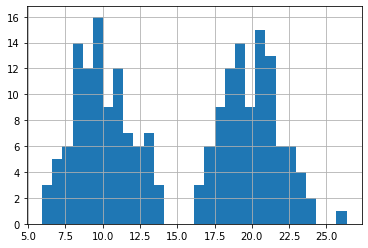

In [30]:
data['x'].hist(bins = 30)

In [31]:
x = 25
g0 = model(x, mu0, sig0, prior0)
g1 = model(x, mu1, sig1, prior1)
g0, g1, 'Class0' if g0 > g1 else 'Class1'

(-33.37509755000565, -5.842012259989249, 'Class1')

# Cok Boyutlu Veri
A multivariate normal random variable.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html

In [32]:
import numpy as np
import pandas as pd

import requests
import io


url = "https://raw.githubusercontent.com/uzay00/KaVe-Egitim/master/ARGE/Sorular/1-İseAlımRobotu/data.csv"
s = requests.get(url).content

data = pd.read_csv(io.StringIO(s.decode('utf-8')))
data

,age,algorithm,gpa,social,y
0,3.576113,3.728920,0.930603,4.438372,1
1,1.829891,4.393183,3.137649,4.831307,1
2,3.981593,4.050717,3.886304,4.865860,1
3,1.734623,4.605488,2.605315,3.663224,1
4,2.759050,4.288383,1.894925,3.238931,1
...,...,...,...,...,...
995,0.756427,0.931875,2.769794,0.218749,0
996,3.344518,1.182757,2.696908,0.735196,0
997,1.812786,1.081876,2.940970,1.076683,0
998,2.316372,2.211849,4.594402,0.614308,0


In [33]:
idx_train = np.random.choice(1000, size = 800,replace = False)
idx_test = np.array(list(set(range(1000)) - set(idx_train)))

X_train = data.values[idx_train, :-1]
y_train = data.values[idx_train, -1]

X_test = data.values[idx_test, :-1]
y_test = data.values[idx_test, -1]

In [34]:
X_train

array([[2.48269441, 0.86921864, 0.02930552, 1.6100666 ],
       [3.2585394 , 0.76155647, 4.55519636, 0.20945754],
       [3.36763413, 0.53509872, 1.54703717, 0.15279346],
       ...,
       [2.85039837, 1.59139243, 1.17515223, 0.969605  ],
       [2.49113378, 0.3898976 , 2.81314596, 0.05229173],
       [2.09137427, 0.73008434, 1.20408582, 0.39639564]])

In [35]:
mu0 = X_train[y_train == 0].mean(axis=0)
mu1 = X_train[y_train == 1].mean(axis=0)
mu0.shape, mu1.shape

((4,), (4,))

In [69]:
sig0 = np.cov(X_train[y_train == 0].T)
sig1 = np.cov(X_train[y_train == 1].T)
sig0.shape, sig1.shape

((4, 4), (4, 4))

In [36]:
prior0 = len(X_train[y_train == 0])/len(data)
prior1 = len(X_train[y_train == 1])/len(data)
prior0,prior1

(0.721, 0.079)

In [37]:
from scipy.stats import multivariate_normal

def model(x, mu, std, prior):
    snd = multivariate_normal.pdf(x, mu, std)
    return np.log(snd) + np.log(prior)

In [38]:
x = np.array([1,1,1,1])
g0 = model(x, mu0, sig0, prior0)
g1 = model(x, mu1, sig1, prior1)
g0, g1, 'Class0' if g0 > g1 else 'Class1'

(-6.4374781347532, -14.141713935389204, 'Class0')

In [39]:
x = np.array([1,5,1,5])
g0 = model(x, mu0, sig0, prior0)
g1 = model(x, mu1, sig1, prior1)
g0, g1, 'Class0' if g0 > g1 else 'Class1'

(-15.707940422226333, -9.072760651565371, 'Class1')